In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras

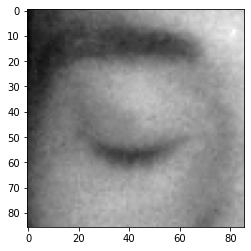

In [13]:
Datasetdirectory = 'archive/train'
Classes = ['Closed_Eyes', 'Open_Eyes']
for category in Classes:
    path = os.path.join(Datasetdirectory, category)
    for img in os.listdir(path):
        image_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(image_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(image_array, cmap="gray")
        plt.show()
        break
    break

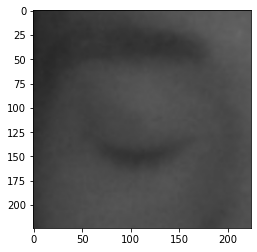

In [14]:
image_size = 224
new_array = cv2.resize(backtorgb, (image_size,image_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [15]:
training_data = []

def create_training_data():
    for category in Classes:
        path = os.path.join(Datasetdirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try :
                image_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(image_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (image_size,image_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()
print(len(training_data))

4000


In [16]:
X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, image_size, image_size, 3)
Images = X/255.0
Labels = np.array(y)

In [17]:
custom_model = keras.Sequential([
    
    keras.layers.Conv2D(kernel_size=3, filters=64, use_bias=False, padding='same', input_shape=(224,224,3)),
    keras.layers.BatchNormalization(center=True, scale=False),
    keras.layers.Activation('relu'),
    
    keras.layers.Conv2D(kernel_size=3, filters=64, use_bias=False, padding='same', strides=2),
    keras.layers.BatchNormalization(center=True, scale=False),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(kernel_size=3, filters=128, use_bias=False, padding='same', strides=2),
    keras.layers.BatchNormalization(center=True, scale=False),
    keras.layers.Activation('relu'),
    
    keras.layers.Conv2D(kernel_size=3, filters=64, use_bias=False, padding='same', strides=2),
    keras.layers.BatchNormalization(center=True, scale=False),
    keras.layers.Activation('relu'),
    
    keras.layers.Conv2D(kernel_size=3, filters=64, use_bias=False, padding='same', strides=2),
    keras.layers.BatchNormalization(center=True, scale=False),
    keras.layers.Activation('relu'),
    
    keras.layers.Conv2D(kernel_size=3, filters=64, use_bias=False, padding='same', strides=2),
    keras.layers.BatchNormalization(center=True, scale=False),
    keras.layers.Activation('relu'),
        
    keras.layers.Conv2D(kernel_size=6, filters=128, use_bias=False, padding='same', strides=2),
    keras.layers.BatchNormalization(center=True, scale=False),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(kernel_size=6, filters=256, use_bias=False, padding='same', strides=2),
    keras.layers.BatchNormalization(center=True, scale=False),
    keras.layers.Activation('relu'),
        
    keras.layers.Flatten(),
    
    keras.layers.Dense(128, activation = 'relu'),
    
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1, activation = 'softmax')
])

In [24]:
custom_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
custom_model.fit(Images,Labels, epochs = 10, batch_size=1, validation_split = 0.1)

Epoch 1/10
3600/3600 [==============================] - 126s 35ms/step - loss: 0.1418 - accuracy: 0.4444 - val_loss: 0.4023 - val_accuracy: 1.0000
Epoch 2/10
3600/3600 [==============================] - 124s 35ms/step - loss: 0.0634 - accuracy: 0.4444 - val_loss: 0.4119 - val_accuracy: 1.0000
Epoch 3/10
3600/3600 [==============================] - 130s 36ms/step - loss: 0.0211 - accuracy: 0.4444 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 4/10
3600/3600 [==============================] - 128s 36ms/step - loss: 0.0424 - accuracy: 0.4444 - val_loss: 0.5382 - val_accuracy: 1.0000
Epoch 5/10
3600/3600 [==============================] - 129s 36ms/step - loss: 0.0043 - accuracy: 0.4444 - val_loss: 0.0483 - val_accuracy: 1.0000
Epoch 6/10
3600/3600 [==============================] - 129s 36ms/step - loss: 2.0177e-05 - accuracy: 0.4444 - val_loss: 6.7437e-04 - val_accuracy: 1.0000
Epoch 7/10
3600/3600 [==============================] - 129s 36ms/step - loss: 0.0397 - accuracy: 0.4444 - val

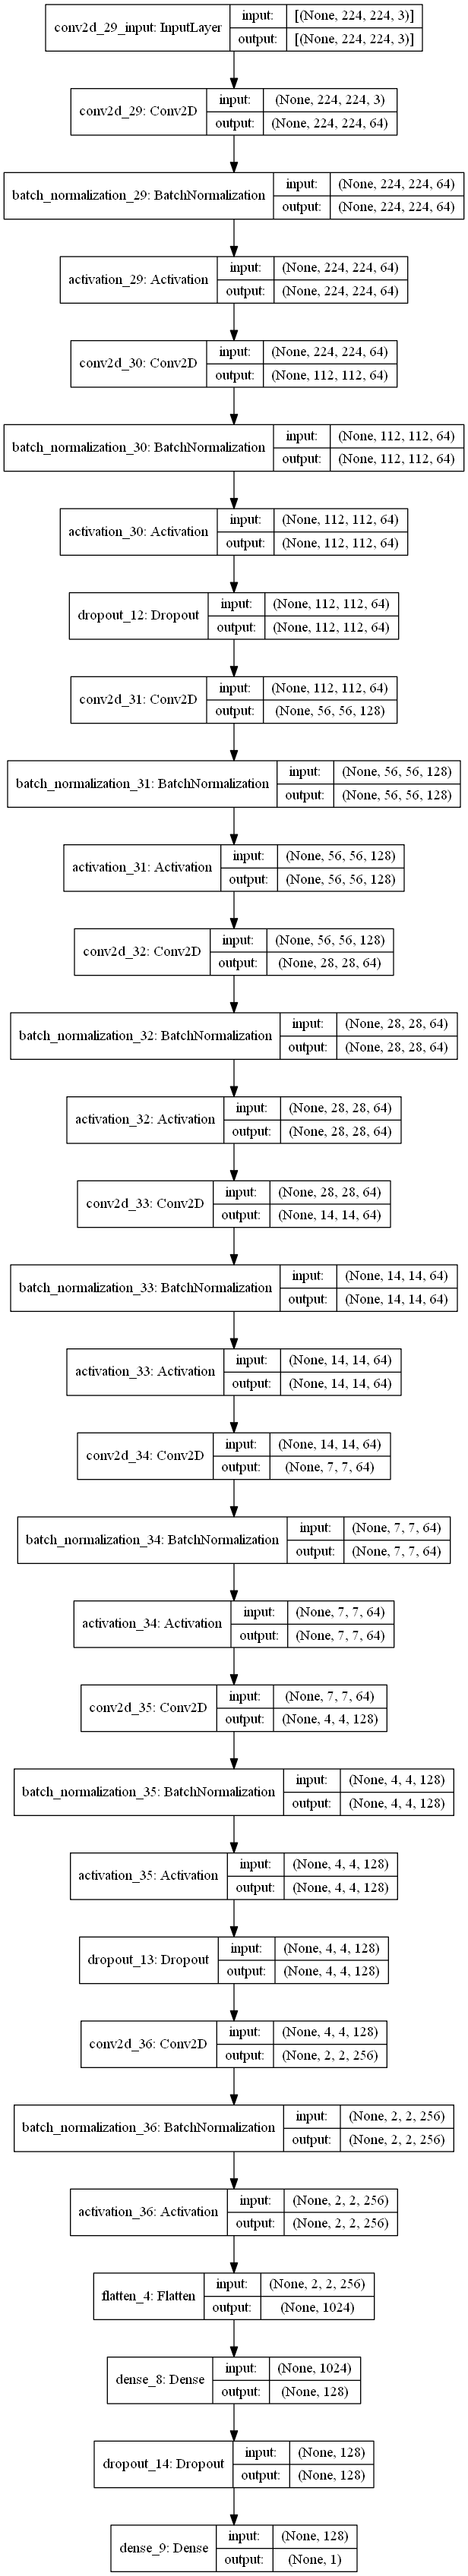

In [25]:
tf.keras.utils.plot_model(custom_model, to_file='custom2.png', show_shapes=True, show_layer_names=True)

In [18]:
model = tf.keras.applications.MobileNet()
base_input = model.layers[0].input
base_output = model.layers[-4].output
Flat_layer = keras.layers.Flatten()(base_output)
final_output = keras.layers.Dense(1)(Flat_layer)
final_output = keras.layers.Activation('sigmoid')(final_output)
pretrained_model = keras.Model(inputs = base_input, outputs = final_output)
pretrained_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [19]:
pretrained_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
pretrained_model.fit(Images,Labels, epochs = 2, batch_size=1, validation_split = 0.1)

Epoch 1/2
3600/3600 [==============================] - 147s 39ms/step - loss: 0.0122 - accuracy: 0.9953 - val_loss: 1.9851e-04 - val_accuracy: 1.0000
Epoch 2/2
3600/3600 [==============================] - 140s 39ms/step - loss: 5.1402e-06 - accuracy: 1.0000 - val_loss: 1.2759e-04 - val_accuracy: 1.0000


In [20]:
#pretrained_model = tf.keras.models.load_model('model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(pretrained_model)
tflite_model = converter.convert()
with open('tflite_model.tflite','wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\SANCHI~1\AppData\Local\Temp\tmpwz4ma2t_\assets


INFO:tensorflow:Assets written to: C:\Users\SANCHI~1\AppData\Local\Temp\tmpwz4ma2t_\assets
